# Capstone II: Pre_processing and Training Data Development

**The different steps we will take are:**

* Standardize the magnitude of numeric features
* Split into testing and training datasets
* Apply scaler to the testing set

We will start by loading the necessary packages 

In [30]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score, GridSearchCV

We need to know what is our curent working directory.

In [31]:
os.getcwd()

'C:\\Users\\meteu\\Desktop\\SPRINGBOARD\\PROJECT 2\\data'

In [32]:
path="C:/Users/meteu/Desktop/SPRINGBOARD/PROJECT 2/data"
print(os.chdir(path))

None


In [33]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is 603D-12C6

 Directory of C:\Users\meteu\Desktop\SPRINGBOARD\PROJECT 2\data

07/03/2020  10:34 AM    <DIR>          .
07/03/2020  10:34 AM    <DIR>          ..
07/03/2020  09:05 AM            89,556 BMI.PNG
06/30/2020  07:50 PM           125,900 chart.PNG
06/27/2020  11:24 AM         3,420,416 clean_data.csv
07/06/2020  08:49 PM         4,040,522 ready_data.csv
               4 File(s)      7,676,394 bytes
               2 Dir(s)  376,437,776,384 bytes free


Let us now load the data we created at the end of EDA.

In [34]:
df=pd.read_csv('ready_data.csv')
df.head()

,Unnamed: 0,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [35]:
df=df.drop(columns=['Unnamed: 0'])
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


Let us check the data type of each columns

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66478 entries, 0 to 66477
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          66478 non-null  int64  
 1   gender       66478 non-null  int64  
 2   height       66478 non-null  int64  
 3   weight       66478 non-null  float64
 4   ap_hi        66478 non-null  int64  
 5   ap_lo        66478 non-null  int64  
 6   cholesterol  66478 non-null  int64  
 7   gluc         66478 non-null  int64  
 8   smoke        66478 non-null  int64  
 9   alco         66478 non-null  int64  
 10  active       66478 non-null  int64  
 11  cardio       66478 non-null  int64  
 12  BMI          66478 non-null  float64
dtypes: float64(2), int64(11)
memory usage: 6.6 MB


# Split into training and testing datasets

We will be using sklearn preprocessing to standardize the scale of features of our dataframe.
We will set `cardio` as our `y` variable (or response variable) and our `X` varibale will be all our dataframe exept `cardio`.

In [48]:
X=df.drop(columns=['cardio'])
y=df['cardio']

Using sklearn model selection import train_test_split, and create a 80/20 split with the y=`cardio`.

In [49]:
from sklearn.model_selection import train_test_split

Let us flatenned our variable y by calling the `ravel()` function on `y`.

In [50]:
y=y.ravel()

We will call `train_test_split()` function with the first two parameters set to `X` and `y`.

In [51]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

change do the split train test first then do the standardization of the training set and and the standardization of the testing set

# Standardize the magnitude of our features

We use StandardScaler() method of the preprocessing package and then call the fit() method with parameter X.

In [52]:
scaler=preprocessing.StandardScaler().fit(X)

We declare 2 variables called X_scaled_train and X_scaled_test and assign them the result of calling the transform() method with respectively parameter X_train and X_test.

In [53]:
X_scaled_train=scaler.transform(X_train)
X_scaled_test=scaler.transform(X_test)

In [54]:
X_scaled_train

array([[ 0.67067983, -0.73274923,  0.45501257, ..., -0.2362407 ,
         0.49551603,  1.69760911],
       [ 0.65202169, -0.73274923,  0.45501257, ..., -0.2362407 ,
         0.49551603, -0.91664924],
       [ 1.28234248,  1.36472336,  0.84022541, ..., -0.2362407 ,
         0.49551603, -0.50874539],
       ...,
       [-1.48676955, -0.73274923,  0.45501257, ..., -0.2362407 ,
        -2.0180982 , -1.29011472],
       [ 0.90917959,  1.36472336,  2.25267253, ..., -0.2362407 ,
         0.49551603,  0.01988727],
       [ 0.12675435, -0.73274923, -0.18700885, ..., -0.2362407 ,
         0.49551603, -0.61422499]])

In [55]:
X_scaled_test

array([[-1.17809894, -0.73274923,  0.71182113, ..., -0.2362407 ,
         0.49551603, -0.66548401],
       [-1.20973666,  1.36472336,  1.35384255, ...,  4.23297084,
         0.49551603,  0.76782946],
       [ 1.55572486,  1.36472336,  1.99586396, ..., -0.2362407 ,
         0.49551603, -0.24109168],
       ...,
       [ 0.15433596, -0.73274923, -1.85626453, ..., -0.2362407 ,
         0.49551603, -0.80586444],
       [-0.82278296, -0.73274923, -0.95743455, ..., -0.2362407 ,
         0.49551603, -1.49538512],
       [ 0.99273563, -0.73274923, -0.70062598, ..., -0.2362407 ,
         0.49551603,  1.73324057]])

# Capstone II: Modeling

**The different steps we will take are:**

* Fit Models with Training Data Set
* Review Model Outcomes — Iterate over additional models as needed.
* Identify the Final Model

## Fit Models with Training Dataset

Let us define certain term and use those term to avaluate how well our model perform.

* `Precision` is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all patient that have cardiovascular disease, how many actually have it?


* `Accuracy` is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations.


* `Recall` calculates the percentage of actual positives a model correctly identified (True Positive).


* `An ROC` curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters: True Positive Rate and False Positive Rate.


* `AUC` stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1). AUC provides an aggregate measure of performance across all possible classification thresholds.


* `F1 Score` is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution.


### Model 1: Logistic Regression

We will use sklearn to fit the model on our training dataset and we will use predict() method to predict our model.

In [56]:
cls = LogisticRegression(solver='lbfgs')
cls.fit(X_scaled_train, y_train)
y_pred = cls.predict(X_scaled_test)

In [57]:
print("F1 score: {:6f}".format(metrics.f1_score(y_test, y_pred)))
print("Accuracy: {:6f}".format(metrics.accuracy_score(y_test, y_pred)))
print("AUC: {:6f}".format(metrics.roc_auc_score(y_test, y_pred)))
print("Precision: {:6f}".format(metrics.precision_score(y_test, y_pred)))

F1 score: 0.708189
Accuracy: 0.727963
AUC: 0.727122
Precision: 0.750898


Let us draw the confusion matrix.

Text(0.5, 15.0, 'Predicted value')

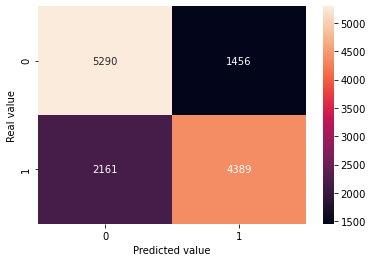

In [58]:
cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel("Real value")
plt.xlabel("Predicted value")

Let us plot the coeficient of our model

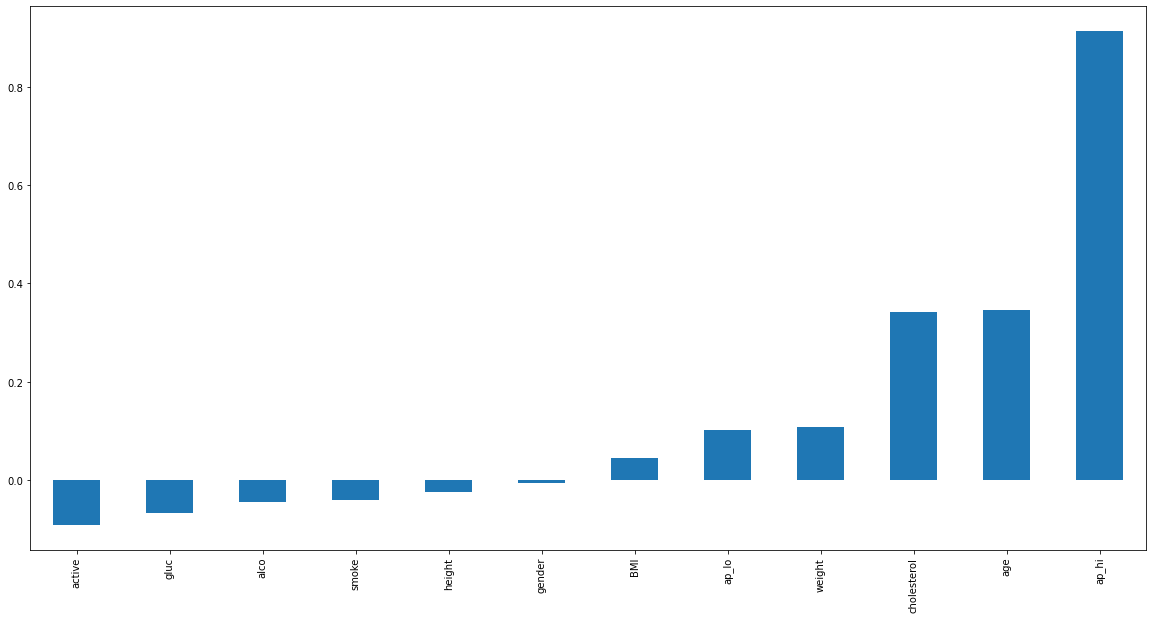

In [59]:
X_scaled_train_pd=pd.DataFrame(data=X_scaled_train, index=None, columns=['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'BMI'])
coefs = pd.Series(cls.coef_[0], index=X_scaled_train_pd.columns)
coefs.sort_values(inplace=True)
plt.figure(figsize=(20,10))
coefs.plot(kind="bar")

Let us remove `height` and `weight` columns from our data and let see how our model perform.

In [60]:
X1=X.drop(columns=['height', 'weight'])

In [61]:
X1_train, X1_test, y_train, y_test=train_test_split(X1, y, test_size=0.2, random_state=1, stratify=y)
scaler=preprocessing.StandardScaler().fit(X1)
X1_scaled_train=scaler.transform(X1_train)
X1_scaled_test=scaler.transform(X1_test)
cls.fit(X1_scaled_train, y_train)
y_pred1 = cls.predict(X1_scaled_test)

In [62]:
print("F1 score: {:6f}".format(metrics.f1_score(y_test, y_pred1)))
print("Accuracy: {:6f}".format(metrics.accuracy_score(y_test, y_pred1)))
print("AUC: {:6f}".format(metrics.roc_auc_score(y_test, y_pred1)))
print("Precision: {:6f}".format(metrics.precision_score(y_test, y_pred1)))

F1 score: 0.708730
Accuracy: 0.728490
AUC: 0.727648
Precision: 0.751540


We can see that our model just improve by a little bit. From now on we will X1 to build future model.

Let us use support Vector Machine for the following model

## Model 2: Support Vector Machine

In [61]:
from sklearn.svm import SVC

In [ ]:
for i, kernel in enumerate(['linear', 'sigmoid', 'poly', 'rbf']):
  print('Kernel', kernel.upper())
  svc = SVC(kernel=kernel, C=1, gamma='auto')
  svc.fit(X1_train, y_train)
  y_pred = svc.predict(X1_test)
  print("\tAccuracy: {:6f}".format(metrics.accuracy_score(y_test, y_pred)))
  print("\tF1 score: {:6f}".format(metrics.f1_score(y_test, y_pred)))
  fig = plt.figure(figsize=(6,10))
  ax = fig.add_subplot(4, 1, i + 1)
  ax.set_title("SVM {}".format(kernel))
  fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred)
  auc = metrics.roc_auc_score(y_test, y_pred)
  print('\tAUC:', auc)
  print("Confusion matrix\n{}\n\n".format(metrics.confusion_matrix(y_test, y_pred)))
  
  plt.plot(fpr, tpr)

Kernel LINEAR
	Accuracy: 0.718487
	F1 score: 0.682447
	AUC: 0.7169695358063471
Confusion matrix
[[5531 1215]
 [2528 4022]]


Kernel SIGMOID
	Accuracy: 0.507371
	F1 score: 0.000000
	AUC: 0.5
Confusion matrix
[[6746    0]
 [6550    0]]


Kernel POLY


In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [64]:
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X1_train, y_train)
y_pred = tree.predict(X1_test)
print("\tAccuracy: {:6f}".format(metrics.accuracy_score(y_test, y_pred)))
print("\tF1 score: {:6f}".format(metrics.f1_score(y_test, y_pred)))


	Accuracy: 0.732626
	F1 score: 0.712495


In [65]:
fig = plt.figure(figsize=(6,6))
ax.set_title("DT")
fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
print('\tAUC:', auc)
plt.plot(fpr, tpr)
print("Confusion matrix\n{}\n\n".format(metrics.confusion_matrix(y_test, y_pred)))

NameError: name 'ax' is not defined

<Figure size 432x432 with 0 Axes>